# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name:Iker Borja Rios

- ID: A01637972

- My carreer: ITC


# Importing libraries

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [217]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/NotebooksProfessor"

else:
    # Define path del proyecto
    Ruta            = ""

# url string that hosts our .csv file
url = Ruta + "/A01637972_X.csv"
# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## A2 Data managment


Print the first 7 rows

In [218]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,2.785038,-0.320253,-0.366829,5.489520,0.589037,-11.627570,-5.194364,10.221068,-10.330072,6.425405,0.335253
1,1,1.512058,-2.787632,-4.509219,3.012480,2.089651,-10.785743,-3.284605,5.555869,-5.119256,6.116187,-0.524283
2,2,-6.791266,2.265681,0.173605,3.318990,-4.902140,1.059345,6.573512,8.931859,-0.911567,7.811470,4.544058
3,3,1.473462,-1.301713,-3.486627,7.179560,-0.288922,-10.038305,-7.998483,4.292517,-9.015017,8.299924,-2.282707
4,4,0.897142,0.066026,-2.561047,7.156621,2.912814,-12.696372,-8.889818,9.609494,-15.232169,5.411228,-0.657676
5,5,0.575540,7.738205,4.555532,9.184514,3.660133,7.006963,0.444127,-8.786824,5.583060,-3.432513,-7.954381
6,6,-0.644227,3.046310,-11.089312,6.724682,-0.042115,-0.013711,-1.609492,-2.109976,5.419936,-5.241262,11.801550


Print the last 4 rows

In [219]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
684,684,4.485890,-0.039411,-1.934012,6.487421,-0.906070,-14.807169,-7.917795,9.482359,-6.547273,5.686055,-3.531208
685,685,-3.195834,5.120192,4.269957,11.082383,0.331762,7.270322,3.399509,-7.838998,2.456319,-5.032645,-9.714281
686,686,-4.962794,3.358656,-8.345166,-0.635303,-7.994467,2.674455,4.409376,8.770110,0.063100,6.748839,4.594317
687,687,4.042040,-1.441539,-4.966627,9.078894,6.333406,-9.660980,-6.995774,7.279895,-13.650498,5.505477,-1.103193


How many rows and columns are in your data?

Use the `shape` method


In [220]:
df.shape

(688, 12)

Print the name of all columns

Use the `columns` method

In [221]:
print(df.columns)

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11'],
      dtype='object')


What is the data type in each column

Use the `dtypes` method

In [222]:
df.dtypes

,0
Unnamed: 0,int64
x1,float64
x2,float64
x3,float64
x4,float64
x5,float64
x6,float64
x7,float64
x8,float64
x9,float64


What is the meaning of rows and columns?

In [223]:
# Your responses here

# 1) La columna Sin nombre: 0 parece servir como índice o identificador de fila.

# 2) Los valores numéricos, que pueden representar características o variables en un conjunto de datos (de una simulación o un entorno experimental, por ejemplo), están contenidos en cada columna, de x1 a x11.

# 3) Los valores que nos ofrecen, a excepción de la columna 0, son flotantes.

#...

Print a statistical summary of your columns


In [224]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,343.500000,-0.105347,2.084932,-3.347256,4.453295,0.638853,1.019980,-1.649809,0.081925,-0.212979,0.870105,-0.924634
std,198.752778,4.715224,3.262176,4.447138,3.503670,3.514833,6.256647,4.506726,7.516520,5.662991,6.249799,6.445175
min,0.000000,-11.775726,-6.143589,-12.642436,-3.578235,-9.409284,-14.807169,-10.644848,-13.873049,-15.844362,-11.556889,-13.067900
25%,171.750000,-3.539439,-0.228382,-7.061557,1.798448,-0.847392,-0.706199,-5.197431,-8.018301,-3.963550,-4.998527,-6.964178
50%,343.500000,0.522833,2.510665,-3.643168,3.934802,1.501607,2.498624,-2.391356,2.762412,0.090632,0.862024,-0.751356
75%,515.250000,3.358323,4.441846,0.541884,6.872078,3.097808,5.083720,1.707453,6.788140,4.690047,6.125021,4.054337
max,687.000000,10.852477,9.448350,7.085676,14.943987,8.991008,13.148945,10.548065,14.860133,11.128206,15.648460,13.946104


In [261]:
# 1) What is the minumum and maximum values of each variable
#df.max()
df.min()

,0
unnamed: 0,0.000000
x1,-11.775726
x2,-6.143589
x3,-12.642436
x4,-3.578235
x5,-9.409284
x6,-14.807169
x7,-10.644848
x8,-13.873049
x9,-15.844362


In [263]:
# 2) What is the mean and standar deviation of each variable
df.mean()
df.std()

,0
unnamed: 0,198.752778
x1,4.715224
x2,3.262176
x3,4.447138
x4,3.503670
x5,3.514833
x6,6.256647
x7,4.506726
x8,7.516520
x9,5.662991


In [267]:
# 3) What the 25%, 50% and 75% represent?
df.quantile(0.25)
df.quantile(0.5)
df.quantile(0.75)

,0.75
unnamed: 0,515.250000
x1,3.358323
x2,4.441846
x3,0.541884
x4,6.872078
x5,3.097808
x6,5.083720
x7,1.707453
x8,6.788140
x9,4.690047


Rename the columns using the same name with capital letters

In [228]:
df.columns = [x.upper() for x in df.columns]
df

,UNNAMED: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,0,2.785038,-0.320253,-0.366829,5.489520,0.589037,-11.627570,-5.194364,10.221068,-10.330072,6.425405,0.335253
1,1,1.512058,-2.787632,-4.509219,3.012480,2.089651,-10.785743,-3.284605,5.555869,-5.119256,6.116187,-0.524283
2,2,-6.791266,2.265681,0.173605,3.318990,-4.902140,1.059345,6.573512,8.931859,-0.911567,7.811470,4.544058
3,3,1.473462,-1.301713,-3.486627,7.179560,-0.288922,-10.038305,-7.998483,4.292517,-9.015017,8.299924,-2.282707
4,4,0.897142,0.066026,-2.561047,7.156621,2.912814,-12.696372,-8.889818,9.609494,-15.232169,5.411228,-0.657676
...,...,...,...,...,...,...,...,...,...,...,...,...
683,683,-10.408806,5.830878,-6.951139,-0.778323,-6.302301,4.111784,4.652592,6.520621,-2.838583,8.315989,1.632904
684,684,4.485890,-0.039411,-1.934012,6.487421,-0.906070,-14.807169,-7.917795,9.482359,-6.547273,5.686055,-3.531208
685,685,-3.195834,5.120192,4.269957,11.082383,0.331762,7.270322,3.399509,-7.838998,2.456319,-5.032645,-9.714281
686,686,-4.962794,3.358656,-8.345166,-0.635303,-7.994467,2.674455,4.409376,8.770110,0.063100,6.748839,4.594317


Rename the columns to their original names

In [229]:
df.columns = [x.lower() for x in df.columns]
df

,unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,2.785038,-0.320253,-0.366829,5.489520,0.589037,-11.627570,-5.194364,10.221068,-10.330072,6.425405,0.335253
1,1,1.512058,-2.787632,-4.509219,3.012480,2.089651,-10.785743,-3.284605,5.555869,-5.119256,6.116187,-0.524283
2,2,-6.791266,2.265681,0.173605,3.318990,-4.902140,1.059345,6.573512,8.931859,-0.911567,7.811470,4.544058
3,3,1.473462,-1.301713,-3.486627,7.179560,-0.288922,-10.038305,-7.998483,4.292517,-9.015017,8.299924,-2.282707
4,4,0.897142,0.066026,-2.561047,7.156621,2.912814,-12.696372,-8.889818,9.609494,-15.232169,5.411228,-0.657676
...,...,...,...,...,...,...,...,...,...,...,...,...
683,683,-10.408806,5.830878,-6.951139,-0.778323,-6.302301,4.111784,4.652592,6.520621,-2.838583,8.315989,1.632904
684,684,4.485890,-0.039411,-1.934012,6.487421,-0.906070,-14.807169,-7.917795,9.482359,-6.547273,5.686055,-3.531208
685,685,-3.195834,5.120192,4.269957,11.082383,0.331762,7.270322,3.399509,-7.838998,2.456319,-5.032645,-9.714281
686,686,-4.962794,3.358656,-8.345166,-0.635303,-7.994467,2.674455,4.409376,8.770110,0.063100,6.748839,4.594317


Use two different alternatives to get one of the columns

In [230]:
# Alternative 1: Using dot notation
df.x1

,x1
0,2.785038
1,1.512058
2,-6.791266
3,1.473462
4,0.897142
...,...
683,-10.408806
684,4.485890
685,-3.195834
686,-4.962794


In [231]:
# Alternative 2: Using bracket notation
df['x1']

,x1
0,2.785038
1,1.512058
2,-6.791266
3,1.473462
4,0.897142
...,...
683,-10.408806
684,4.485890
685,-3.195834
686,-4.962794


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [232]:
df.iloc[62:73,1:3]

,x1,x2
62,-1.074474,4.433935
63,-1.618958,5.280154
64,-0.466137,3.459783
65,2.782683,-1.526594
66,0.523998,4.867162
67,2.369896,0.442358
68,2.791381,2.415206
69,1.584969,2.154850
70,2.585383,4.678572
71,1.630003,1.063027


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [233]:
df.iloc[:,1:3].isnull().sum()

,0
x1,0
x2,0


Discard the last column


In [234]:
df = df.iloc[:,:-1]
df

,unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,2.785038,-0.320253,-0.366829,5.489520,0.589037,-11.627570,-5.194364,10.221068,-10.330072,6.425405
1,1,1.512058,-2.787632,-4.509219,3.012480,2.089651,-10.785743,-3.284605,5.555869,-5.119256,6.116187
2,2,-6.791266,2.265681,0.173605,3.318990,-4.902140,1.059345,6.573512,8.931859,-0.911567,7.811470
3,3,1.473462,-1.301713,-3.486627,7.179560,-0.288922,-10.038305,-7.998483,4.292517,-9.015017,8.299924
4,4,0.897142,0.066026,-2.561047,7.156621,2.912814,-12.696372,-8.889818,9.609494,-15.232169,5.411228
...,...,...,...,...,...,...,...,...,...,...,...
683,683,-10.408806,5.830878,-6.951139,-0.778323,-6.302301,4.111784,4.652592,6.520621,-2.838583,8.315989
684,684,4.485890,-0.039411,-1.934012,6.487421,-0.906070,-14.807169,-7.917795,9.482359,-6.547273,5.686055
685,685,-3.195834,5.120192,4.269957,11.082383,0.331762,7.270322,3.399509,-7.838998,2.456319,-5.032645
686,686,-4.962794,3.358656,-8.345166,-0.635303,-7.994467,2.674455,4.409376,8.770110,0.063100,6.748839


### Questions

Based on the previos results, provide a description of yout dataset

Your response:




## A3 Data visualization

Plot in the same figure the histogram of two variables



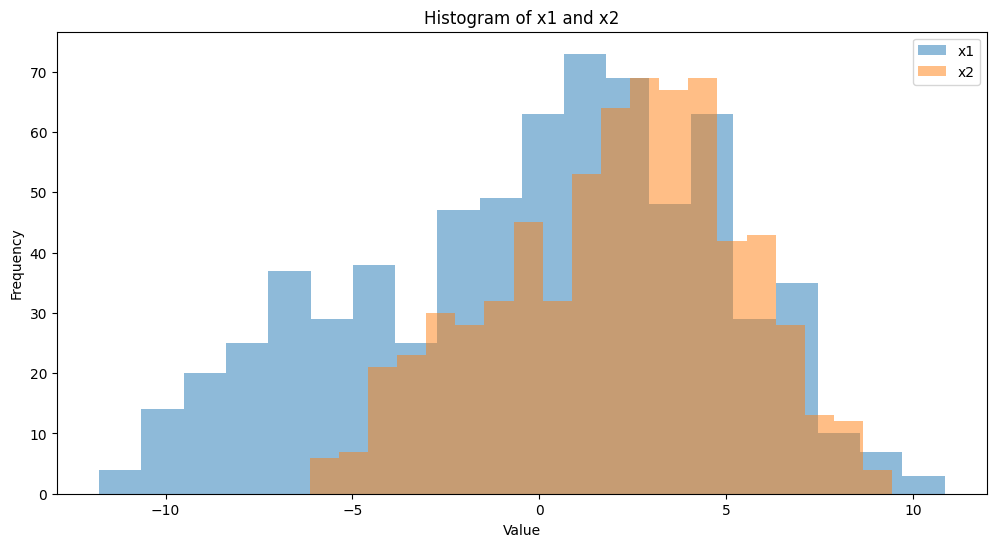

In [235]:
plt.figure(figsize=(12, 6))
plt.hist(df['x1'], bins=20, alpha=0.5, label='x1')
plt.hist(df['x2'], bins=20, alpha=0.5, label='x2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x1 and x2')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot in the same figure the boxplot of two variables

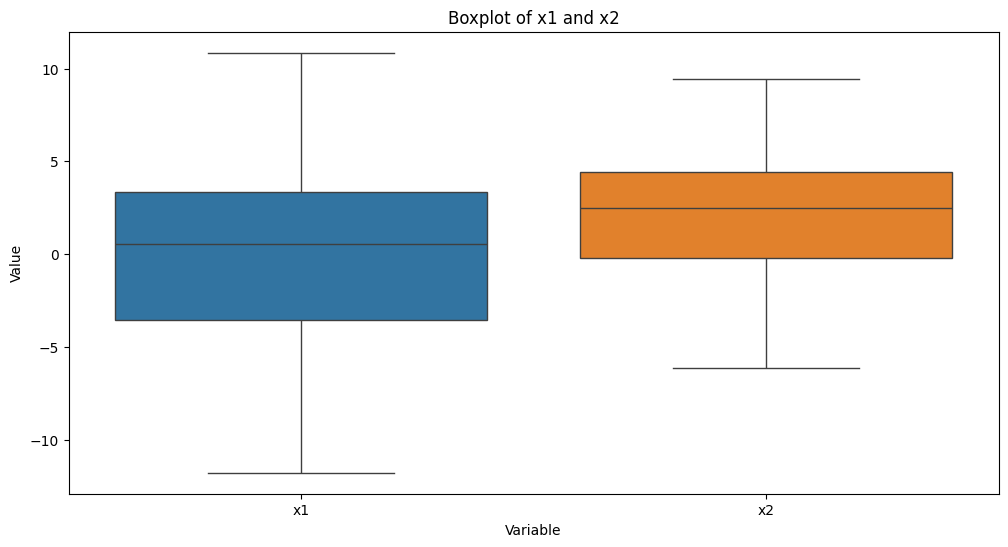

In [236]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['x1', 'x2']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Boxplot of x1 and x2')
plt.show()

Plot the scatter plot of two variables

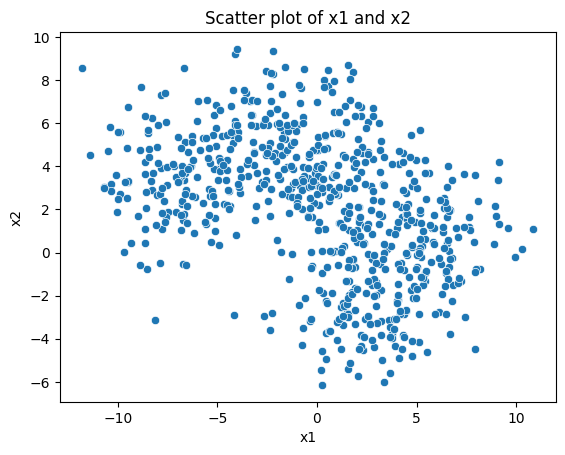

In [237]:
sns.scatterplot(data=df, x='x1', y='x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of x1 and x2')
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


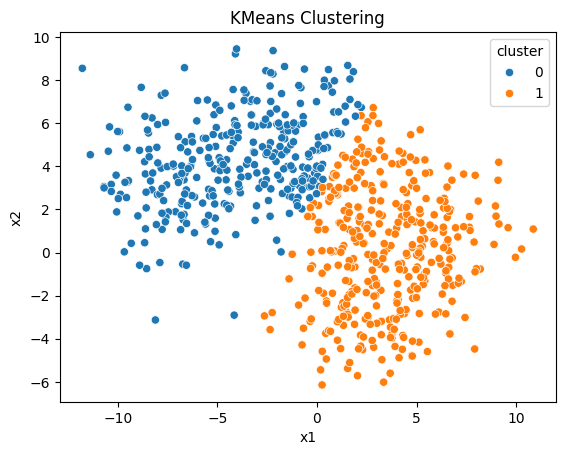

In [238]:
# prompt: Do Kmeans clustering assuming a number of clusters accorging to the scatter plot

import matplotlib.pyplot as plt
# Assuming you want to cluster based on 'x1' and 'x2'
X = df[['x1', 'x2']]

# Determine the number of clusters from your scatter plot (replace 'n_clusters' with your chosen value)
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster labels for each data point
df['cluster'] = kmeans.labels_

# Visualize the clusters
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster')
plt.title('KMeans Clustering')
plt.show()


Add to your dataset a column with the estimated cluster to each data point

In [239]:
df['cluster'] = kmeans.fit_predict(df[['x1', 'x2']])
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,cluster
0,0,2.785038,-0.320253,-0.366829,5.489520,0.589037,-11.627570,-5.194364,10.221068,-10.330072,6.425405,1
1,1,1.512058,-2.787632,-4.509219,3.012480,2.089651,-10.785743,-3.284605,5.555869,-5.119256,6.116187,1
2,2,-6.791266,2.265681,0.173605,3.318990,-4.902140,1.059345,6.573512,8.931859,-0.911567,7.811470,0
3,3,1.473462,-1.301713,-3.486627,7.179560,-0.288922,-10.038305,-7.998483,4.292517,-9.015017,8.299924,1
4,4,0.897142,0.066026,-2.561047,7.156621,2.912814,-12.696372,-8.889818,9.609494,-15.232169,5.411228,1
...,...,...,...,...,...,...,...,...,...,...,...,...
683,683,-10.408806,5.830878,-6.951139,-0.778323,-6.302301,4.111784,4.652592,6.520621,-2.838583,8.315989,0
684,684,4.485890,-0.039411,-1.934012,6.487421,-0.906070,-14.807169,-7.917795,9.482359,-6.547273,5.686055,1
685,685,-3.195834,5.120192,4.269957,11.082383,0.331762,7.270322,3.399509,-7.838998,2.456319,-5.032645,0
686,686,-4.962794,3.358656,-8.345166,-0.635303,-7.994467,2.674455,4.409376,8.770110,0.063100,6.748839,0


Print the number associated to each cluster

In [240]:
df['cluster'].value_counts()

,count
cluster,
1,361
0,327


Print the centroids

In [241]:
kmeans.cluster_centers_

array([[-4.04141752,  4.29780876],
       [ 3.48085001,  0.0687545 ]])

Print the intertia metric

In [242]:
kmeans.inertia_

9804.165695586235

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

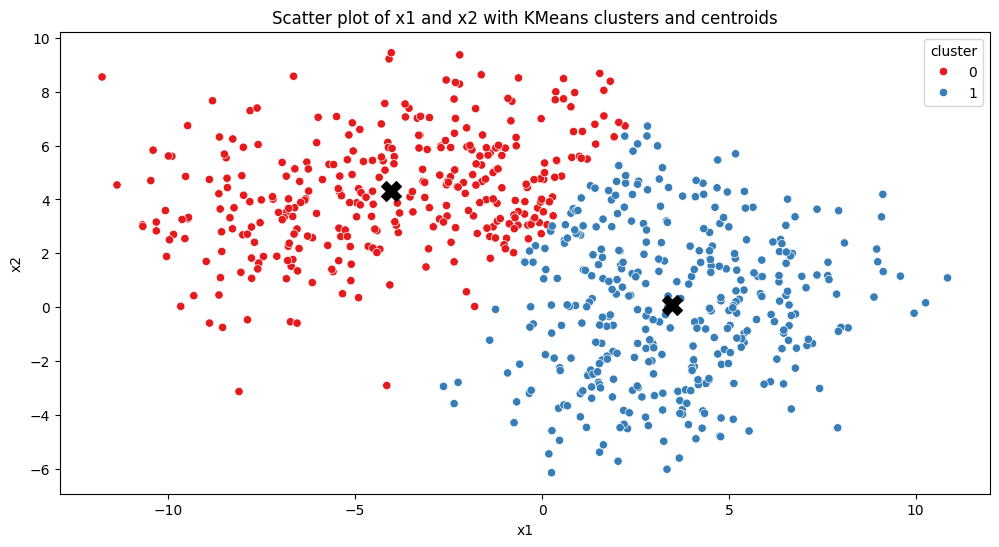

In [243]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='black', s=200)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of x1 and x2 with KMeans clusters and centroids')
plt.show()

### Questions

Provides a detailed description of your results

Your response:

## A5 Elbow plot

Compute the Elbow plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

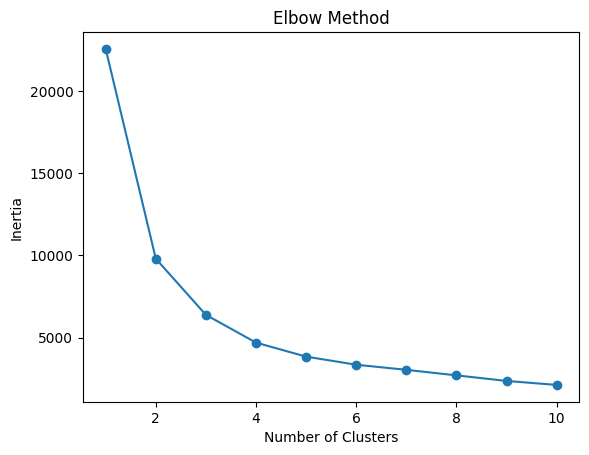

In [244]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['x1', 'x2']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


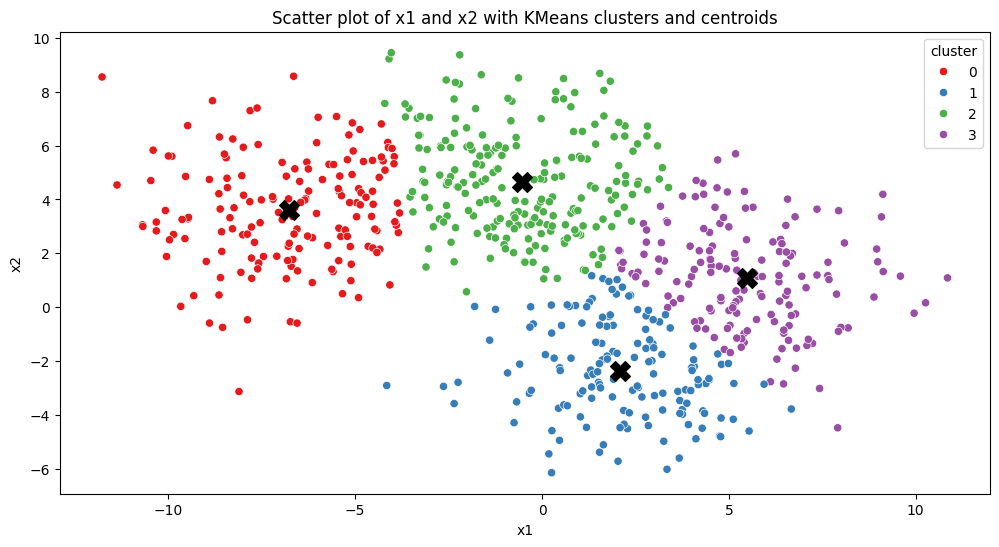

In [253]:
# prompt: Do Kmeans clustering of 5 clusters from the "df" dataset and plot a scatter plot of the data using different color for each cluster. Also plot the centroids

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['x1', 'x2']])

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='black', s=200)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of x1 and x2 with KMeans clusters and centroids')
plt.show()


### Questions

What is the best number of clusters K? (argue your response)

Your response:


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Logré la subcompetencia "Construcción de modelos" de manera adecuada, ya que considero haber entendido las bases del modelo de K-means. Comprendí el funcionamiento del método de clustering para agrupar datos, y lo puse en práctica a lo largo del curso con tres bases de datos.